In [1]:
import pandas as pd

In [73]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

# Задача 1
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

In [83]:
df = pd.read_csv('./kc-house-data.csv', sep=',')
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Исходная таблица информации содержит  21613 строчек и 21 столбец. Пропусков нет. Основные данные числовые, стороковые данные толь одни в столбце date.

Перевод названия столбцов:
id - Уникальный ID для каждого дома
date - Дата продажи дома
price - Стоимость продажи дома
bedrooms - Количество спален
bathrooms - Количество ванных комнат (0.5 - туалет без душа)
sqft_living -  жилые кв. метры
sqft_lot - общие кв. метры 
floors - Количество этажей
waterfront - Есть набержная или нет
view - Значение от 0 до 4 насколько хороший вид
condition - Значение от 1 до 5 насколько хорошее состояние
grade - Значение от 1 до 13, где 1-3 плохая конструкция здания и дизайн, 7 - средний уровень конструкции и дизайна, 
11-13 - высокое качество конструкции и дизайна
sqft_above - Кв. метры дома, которые находятся выше земли
sqft_basement - Кв. метры дома, которые находятся ниже земли
yr_built - Год постройки дома
yr_renovated - Год ремонта дома
zipcode - Индекс
lat - Широта
long - Долгота
sqft_living15 - Кв. метры жилой площади у 15 соседей
sqft_lot15 - Кв. метры общей площади у 15 соседей

## 1.2. Изучите стоимости недвижимости

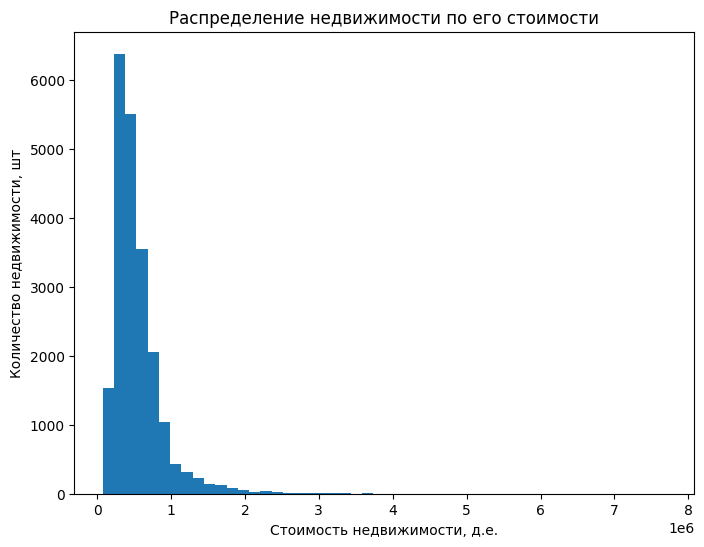

In [38]:
plt.figure(figsize=(8,6))
plt.hist(df["price"], bins = 50)
plt.title("Распределение недвижимости по его стоимости")
plt.xlabel("Стоимость недвижимости, д.е.")
plt.ylabel("Количество недвижимости, шт");

В целом количество домов прямопропорционально их стоимости (чем выше стоимость, тем ниже количество домов). Основное количество домов продается в диапозоне до 2 000 000 д.е.,  при этом наибольшее количество домов продается в диапозоне от 400 000 до  800 000 д.е.

## 1.3. Изучите распределение квадратуры жилой

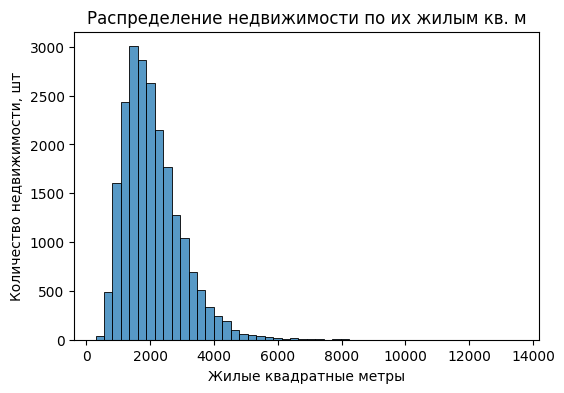

In [39]:
plt.figure(figsize = (6,4))
sns.histplot(df['sqft_living'], bins = 50)
plt.xlabel('Жилые квадратные метры')
plt.ylabel('Количество недвижимости, шт')
plt.title('Распределение недвижимости по их жилым кв. м');

Основная часть жилья не превышает 6 000 кв.м, при этом максимальное количество жилья приходится на недвижимость с 1600-1800 жилых кв. м 

## 1.4. Изучите распределение года постройки

In [40]:
data_yr = df['yr_built'].value_counts(ascending=True)

In [41]:
years_list = [1900+i*10 for i in range (0,13)]

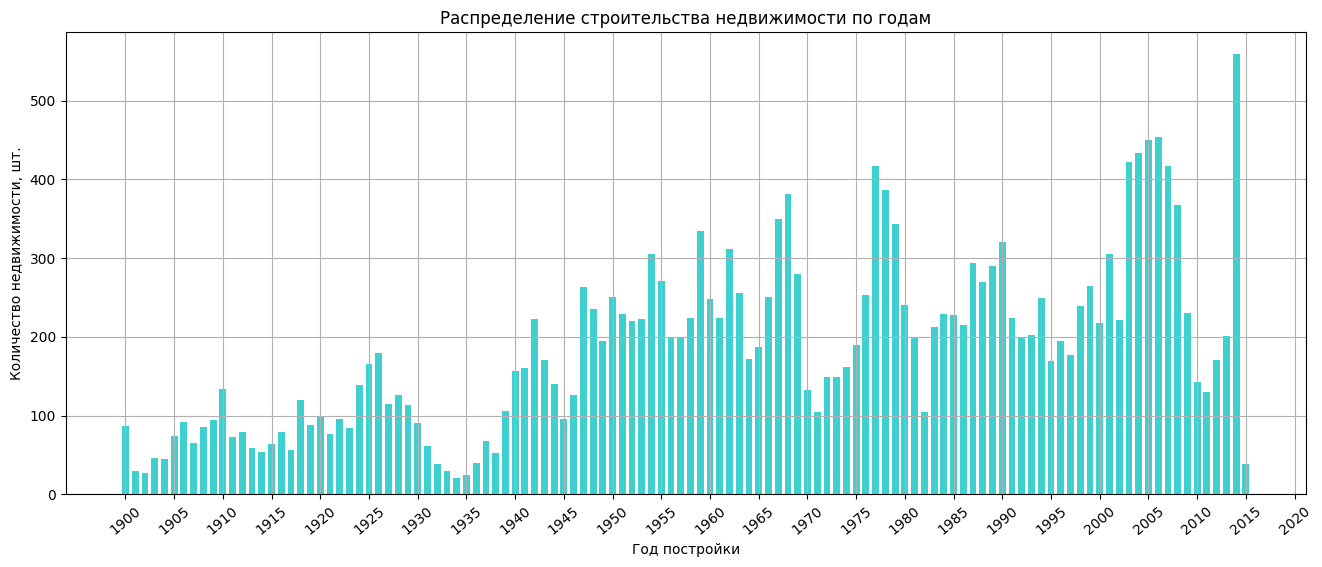

In [46]:
names = data_yr.index
values = data_yr.values
yr_list = list(range(1900,2025,5))
plt.figure(figsize=(16, 6))
plt.bar(names,values, width=0.7, facecolor='c', alpha=0.75)
plt.title('Распределение строительства недвижимости по годам')
plt.xlabel('Год постройки')
plt.ylabel('Количество недвижимости, шт.')
plt.grid(True)
plt.xticks(yr_list,rotation=40);
plt.show()

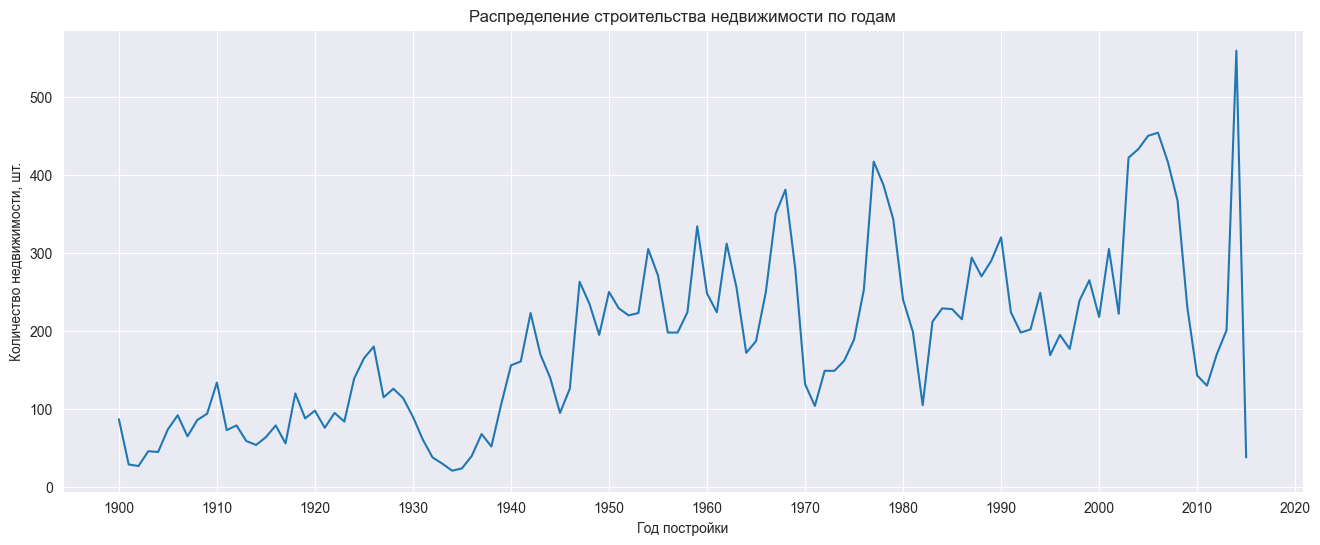

In [52]:
plt.figure(figsize=(16,6))
sns.lineplot(data=data_yr, x=names,y=values)
plt.title('Распределение строительства недвижимости по годам')
plt.xlabel('Год постройки')
plt.ylabel('Количество недвижимости, шт.')
plt.xticks(ticks=years_list);

Как видно из графика, в целом количество строиющейся недвижимости имеет положительную динамику роста. Однако, отмечается падение темпов строительства недвижимости в середине 30-х годов (34-35 годы) и в 1945 году. В 1972 и в  1982 годах строительство недвижимости сократилость практически до уровня 1945 года. Замедление строительсва недвижимости также отмечается с начала 90-х годов в течении практически всего десятилетия. Пик строительста недвижимости приходится на 1968, 1977, 2006 и 2014 годы. 

# 2 задача
Постройте график
Сделайте выводы

## 2.1. Изучите распределение домов от наличия вида на набережную

In [53]:
WF = df['waterfront'].value_counts()
names = WF.index
values = WF.values

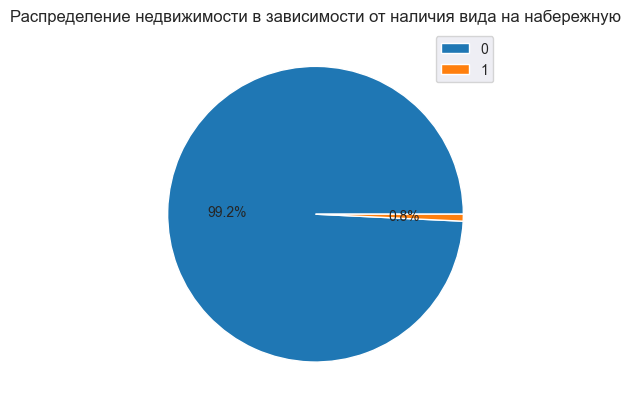

In [56]:
plt.pie(values, autopct='%.1f%%')
plt.title('Распределение недвижимости в зависимости от наличия вида на набережную')
plt.legend(WF.index);

Как водно из графика, вид на набережную имеет только 0,8% недвижомости, 99,2% недвижиомсти не имеет вида на набережную.

## 2.2. Изучите распределение этажей домов

In [57]:
FL = df['floors'].value_counts()
names = FL.index
values = FL.values

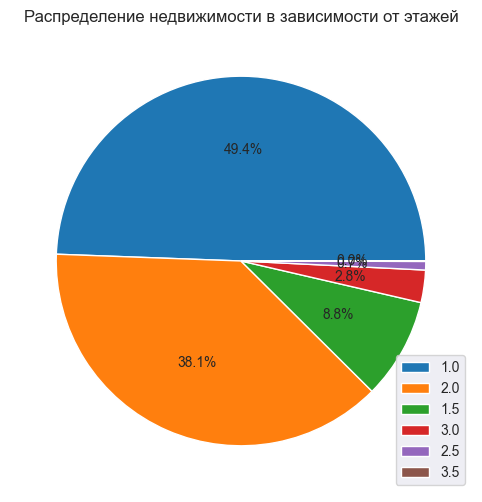

In [66]:
plt.figure(figsize=(8,6))
plt.pie(values, autopct='%.1f%%')
plt.title('Распределение недвижимости в зависимости от этажей')
plt.legend(FL.index);

Text(0, 0.5, 'Количество недвижимости, шт.')

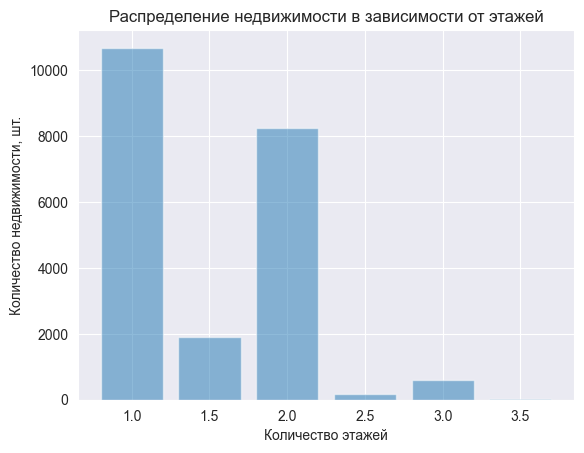

In [61]:
plt.bar(names,values, width=0.4, alpha=0.5)
plt.title('Распределение недвижимости в зависимости от этажей')
plt.xlabel('Количество этажей')
plt.ylabel('Количество недвижимости, шт.')

Как видно из графика, наибольшая доля приходится на 1- этажную недвижимость (49,4%), 38,1% приходится на двухэтажную недвижимость. Наименьшую долю недвижимости составляют 2,5-этажные и 3,5-этажные дома с 0,74% и 0,04% соответственно.

## 2.3. Изучите распределение состояния домов

In [67]:
con = df['condition'].value_counts()
names = con.index
values = con.values

Text(0, 0.5, 'Количество недвижимости, шт.')

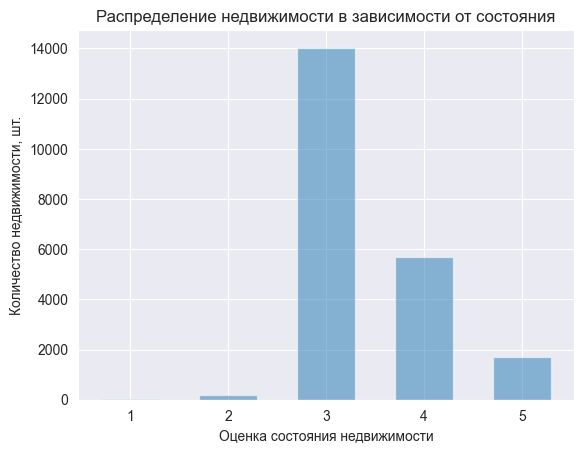

In [89]:
plt.bar(names,values, width=0.6, alpha=0.5)
plt.title('Распределение недвижимости в зависимости от состояния')
plt.xlabel('Оценка состояния недвижимости')
plt.ylabel('Количество недвижимости, шт.')

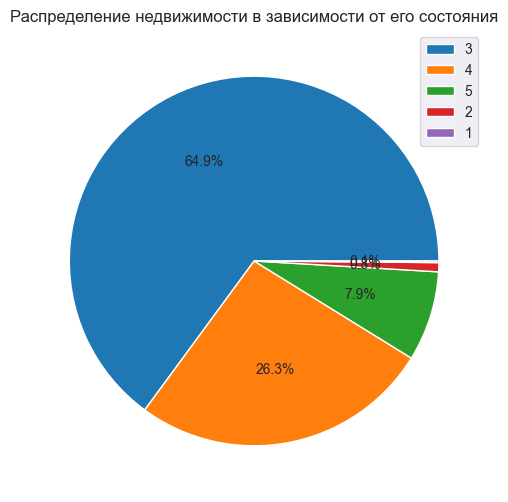

In [71]:
plt.figure(figsize=(8,6))
plt.pie(values, autopct='%.1f%%')
plt.title('Распределение недвижимости в зависимости от его состояния')
plt.legend(con.index);

Наибольшее количество домов имеет среднее состояние (имеют оценку 3), при этом в хорошем состоянии находится более 1/4 недвижимости или 26,3%. В отличном состоянии на ходится 7,9% недвижимости. В плохом состоянии находится менее 1% недвижимости.

# 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости на основе матрицы корреляции.

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [76]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

id  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
id             1.0    0.0       0.0        0.0          0.0       0.0     0.0   
price          0.0    1.0       0.3        0.5          0.7       0.0     0.3   
bedrooms       0.0    0.3       1.0        0.5          0.6       0.0     0.0   
bathrooms      0.0    0.5       0.5        1.0          0.8       0.0     0.5   
sqft_living    0.0    0.7       0.6        0.8          1.0       0.0     0.4   
sqft_lot       0.0    0.0       0.0        0.0          0.0       1.0     0.0   
floors         0.0    0.3       0.0        0.5          0.4       0.0     1.0   
waterfront     0.0    0.3       0.0        0.0          0.0       0.0     0.0   
view           0.0    0.4       0.0        0.0          0.3       0.0     0.0   
condition      0.0    0.0       0.0        0.0          0.0       0.0    -0.3   
grade          0.0    0.7       0.4        0.7          0.8       0.0     0.5   
sqft_above     0.0    0.6       0.5        0.7          0.9       0.0     0.5   
sqft_basement  0.0    0.3       0.3        0.3          0.4       0.0     0.0   
yr_built       0.0    0.0       0.0        0.5          0.3       0.0     0.5   
yr_renovated   0.0    0.0       0.0        0.0          0.0       0.0     0.0   
zipcode        0.0    0.0       0.0        0.0          0.0       0.0     0.0   
lat            0.0    0.3       0.0        0.0          0.0       0.0     0.0   
long           0.0    0.0       0.0        0.0          0.0       0.0     0.0   
sqft_living15  0.0    0.6       0.4        0.6          0.8       0.0     0.3   
sqft_lot15     0.0    0.0       0.0        0.0          0.0       0.7     0.0   

               waterfront  view  condition  grade  sqft_above  sqft_basement  \
id                    0.0   0.0        0.0    0.0         0.0            0.0   
price                 0.3   0.4        0.0    0.7         0.6            0.3   
bedrooms              0.0   0.0        0.0    0.4         0.5            0.3   
bathrooms             0.0   0.0        0.0    0.7         0.7            0.3   
sqft_living           0.0   0.3        0.0    0.8         0.9            0.4   
sqft_lot              0.0   0.0        0.0    0.0         0.0            0.0   
floors                0.0   0.0       -0.3    0.5         0.5            0.0   
waterfront            1.0   0.4        0.0    0.0         0.0            0.0   
view                  0.4   1.0        0.0    0.3         0.0            0.3   
condition             0.0   0.0        1.0    0.0         0.0            0.0   
grade                 0.0   0.3        0.0    1.0         0.8            0.0   
sqft_above            0.0   0.0        0.0    0.8         1.0            0.0   
sqft_basement         0.0   0.3        0.0    0.0         0.0            1.0   
yr_built              0.0   0.0       -0.4    0.4         0.4            0.0   
yr_renovated          0.0   0.0        0.0    0.0         0.0            0.0   
zipcode               0.0   0.0        0.0    0.0        -0.3            0.0   
lat                   0.0   0.0        0.0    0.0         0.0            0.0   
long                  0.0   0.0        0.0    0.0         0.3            0.0   
sqft_living15         0.0   0.3        0.0    0.7         0.7            0.0   
sqft_lot15            0.0   0.0        0.0    0.0         0.0            0.0   

               yr_built  yr_renovated  zipcode  lat  long  sqft_living15  \
id                  0.0           0.0      0.0  0.0   0.0            0.0   
price               0.0           0.0      0.0  0.3   0.0            0.6   
bedrooms            0.0           0.0      0.0  0.0   0.0            0.4   
bathrooms           0.5           0.0      0.0  0.0   0.0            0.6   
sqft_living         0.3           0.0      0.0  0.0   0.0            0.8   
sqft_lot            0.0           0.0      0.0  0.0   0.0            0.0   
floors              0.5           0.0      0.0  0.0   0.0            0.3   
waterfront          0.0  

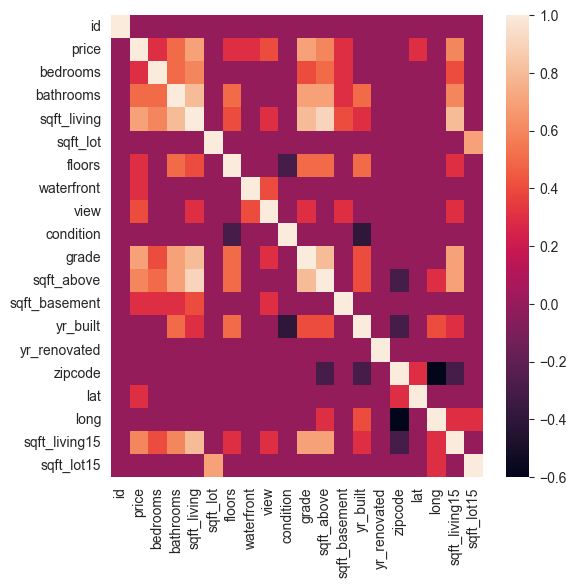

In [80]:
plt.figure(figsize = (6,6))
sns.heatmap(corr_matrix);

На цену недвижимости влияют больше всего следующие параметры:
жилая площадь;
качество конструкции и дизайна дома (класс);
историческую ценность;
размеры 15 соседних домов (Кв. метры жилой площади у 15 соседей).


C:\Users\fenix\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


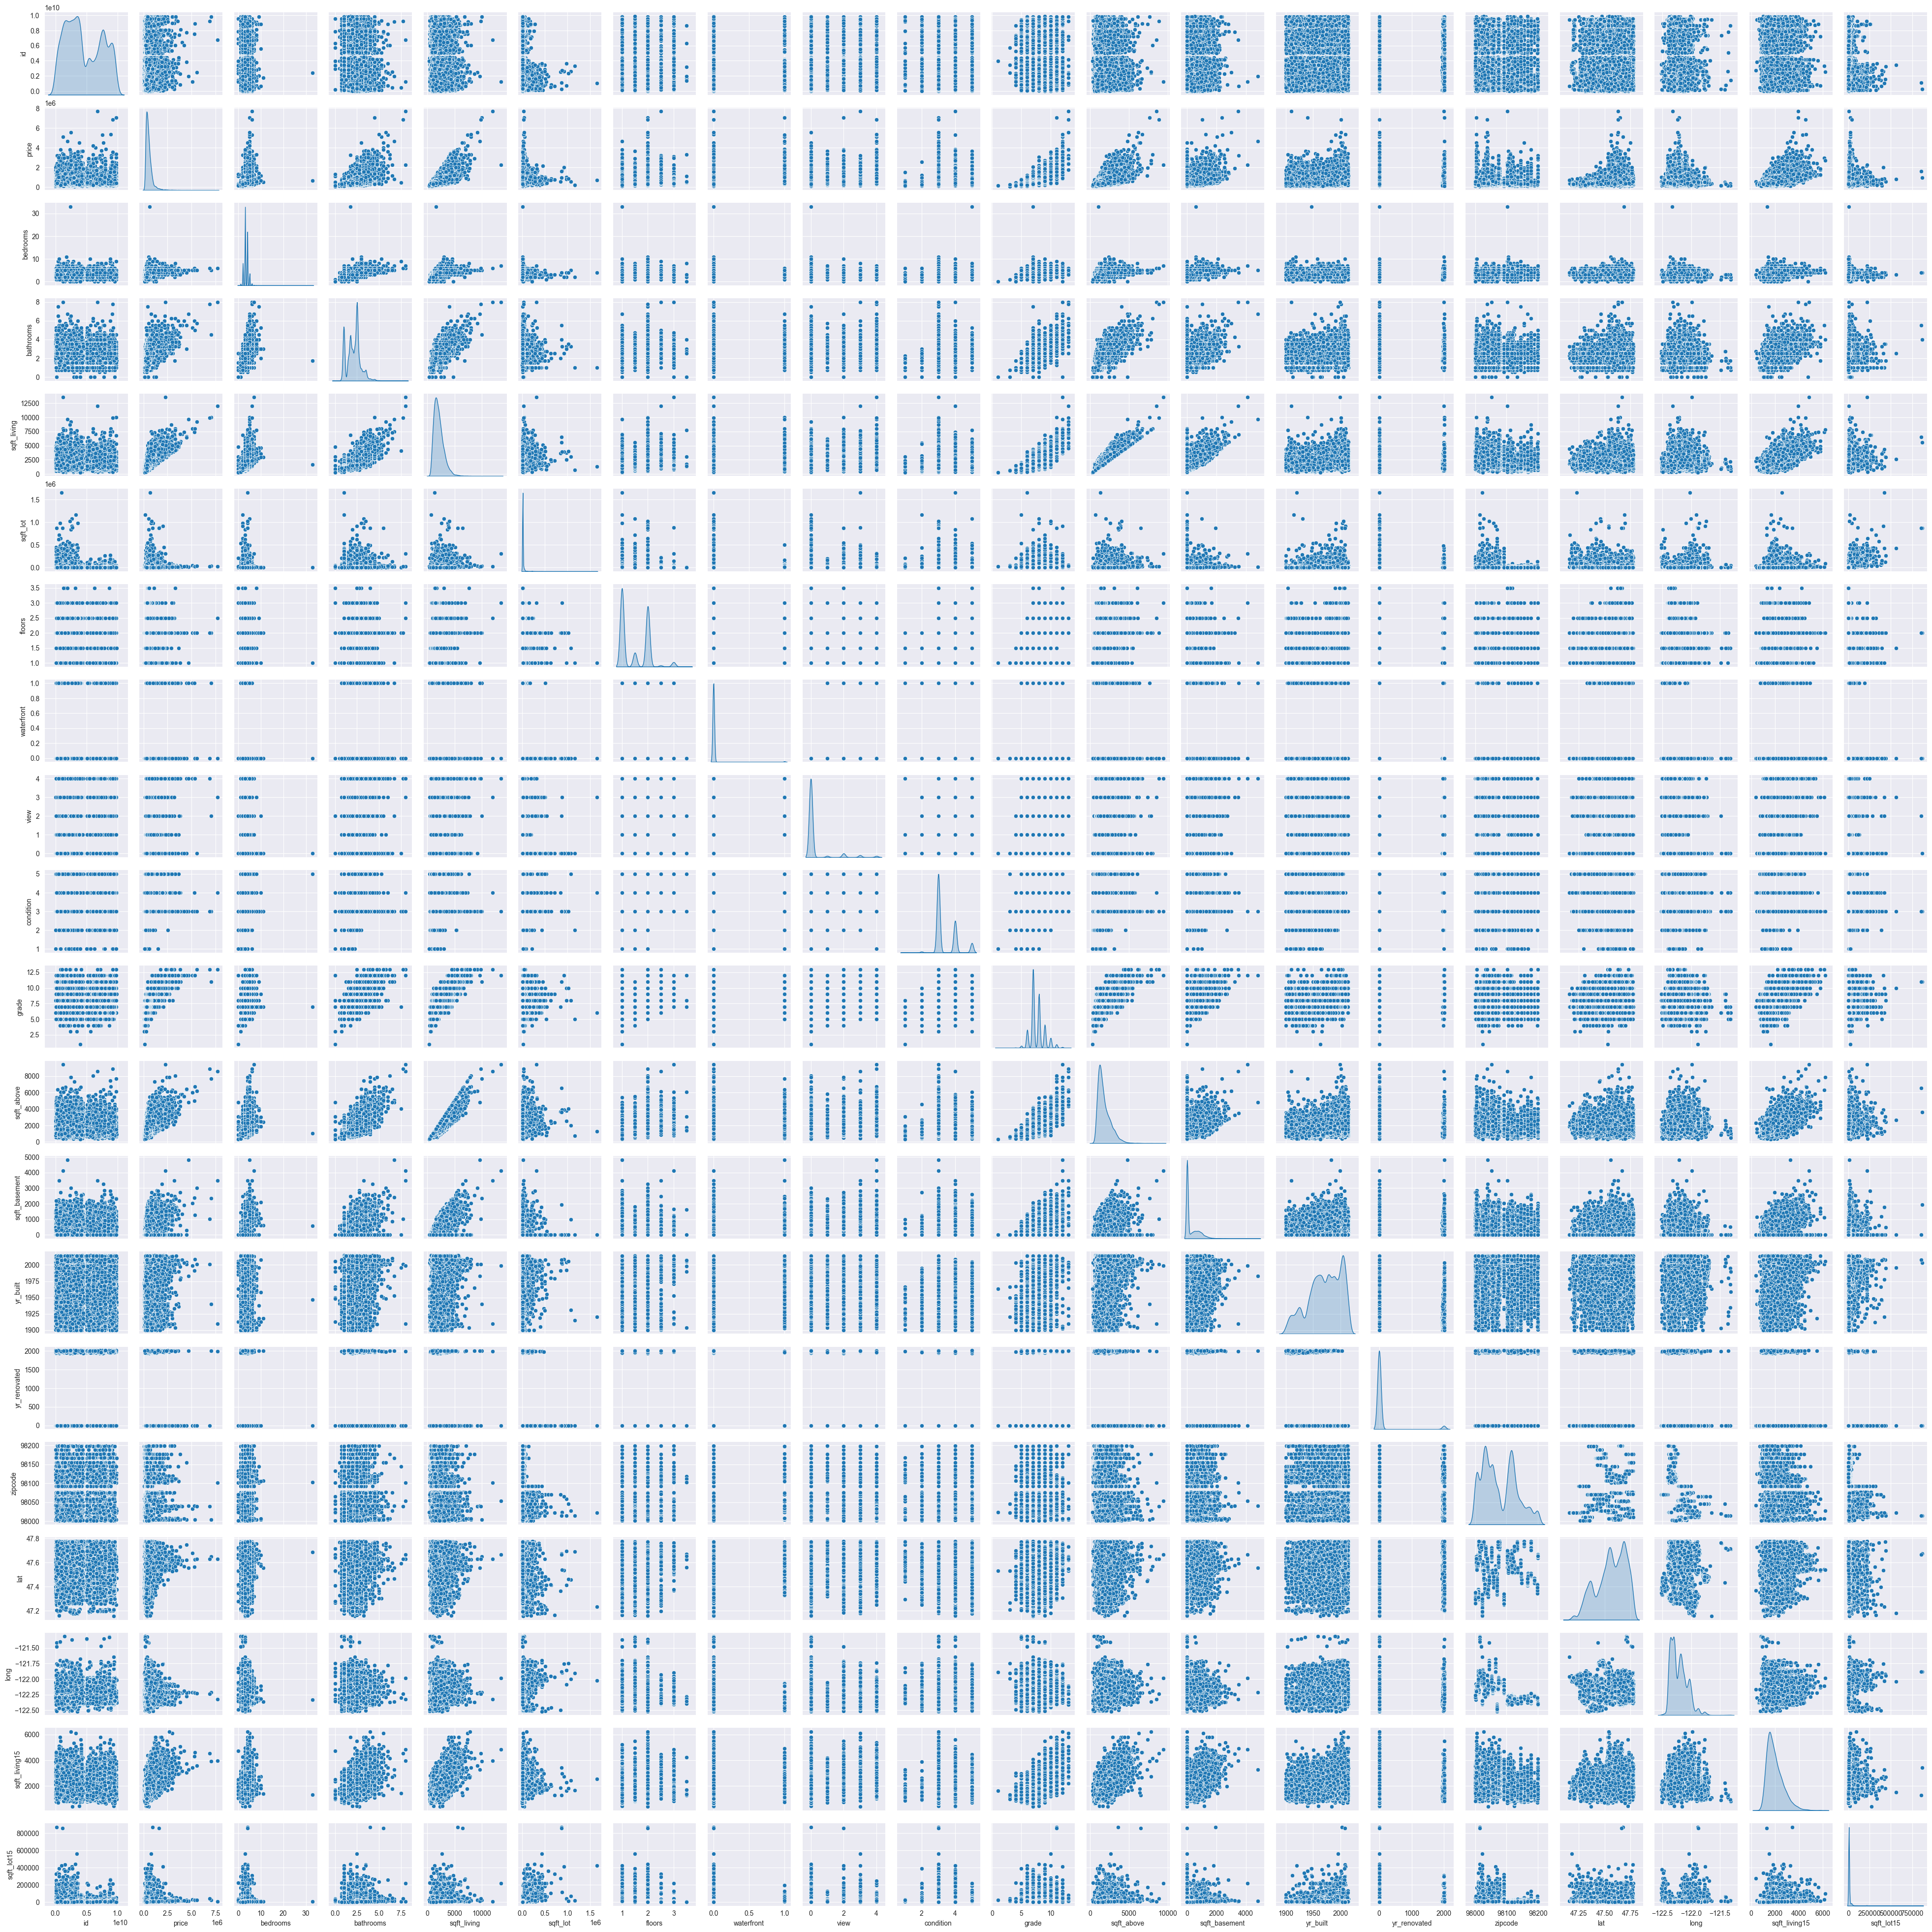

In [81]:
sns.pairplot(df, height=2, kind='scatter', diag_kind='kde')
plt.show()

In [90]:
bp = df.groupby('yr_built')['price'].mean().reset_index()
bp

yr_built          price
0        1900  581387.206897
1        1901  556935.931034
2        1902  673007.407407
3        1903  480958.195652
4        1904  583756.644444
..        ...            ...
111      2011  544522.000000
112      2012  527447.335294
113      2013  678545.452736
114      2014  683681.754919
115      2015  759785.157895

[116 rows x 2 columns]

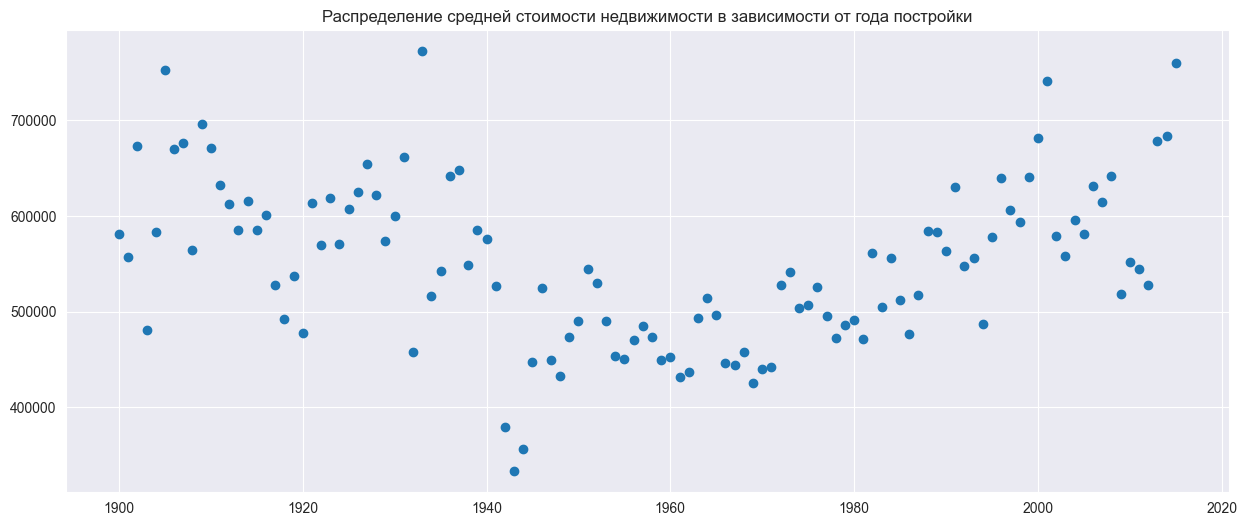

In [91]:
plt.figure(figsize=(15, 6))
plt.scatter(bp['yr_built'], data['price'])
plt.title('Распределение средней стоимости недвижимости в зависимости от года постройки');

- цена на дома, построенные с 1900-х до 1960-х, постепенно опускалась,  при этом цена на дома, построенные в 1940-х годах, также имеет низкие значения;
- цена на дома, построенные с 1960-х годов, вновь начала расти, а для домов, построенных в 2000-х годах, цена почти такая же, как и для домов, построенных в 1900-х годах;
- можно предположить, что старые дома, которые стоят больше 1 века, имеют особую историческую значимость и поэтому их цена находится на одном уровне с ценами домов, построенных в 2000-х годах.

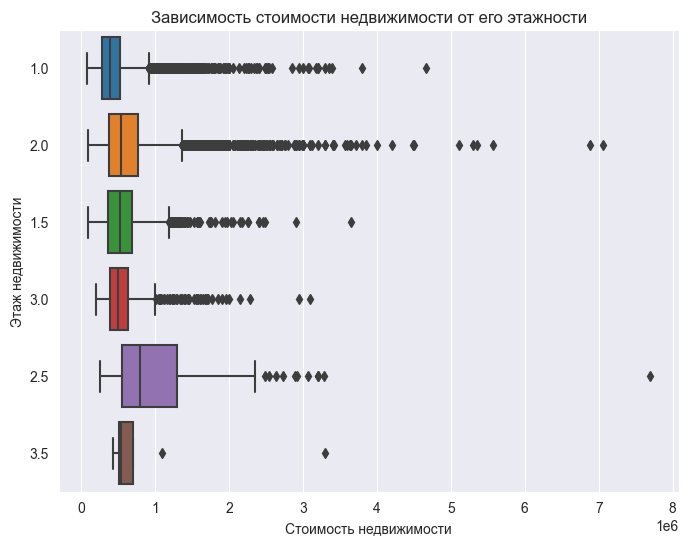

In [88]:
plt.figure(figsize = (8,6))
sns.boxplot(x = df['price'], y = df['floors'].astype('str'), whis = 1.5)
plt.xlabel('Стоимость недвижимости')
plt.ylabel('Этаж недвижимости')
plt.title('Зависимость стоимости недвижимости от его этажности');

- наибольший разброс по стоимости недвижимости наблюдается для недвижимости в 2,5 этажей, при этом минимальный разброс по стоимости недвижимости отмечен в недвижимости имеющий 3,5 этажа;
- по 2-этажной недвижимости наблюдается максимальное количество выбросов, в то время как недвижимость имеющая с 3,5 этажа почти не имеет выбросов;
- самый дорогой дом имеет 2,5 этажа и продается почти за 8 000 000 д.е.